# Aproximacion de una intregal mediente Método de Monte Carlo Media Muestral

El método de Monte Carlo es una técnica de simulación que utiliza el muestreo aleatorio para aproximar resultados numéricos. Una de las aplicaciones comunes es la aproximación de integrales. 

Pasos para el método:
1. Definir la función $f(x)$ a integrar.
2. Generar puntos aleatorios uniformemente distribuidos en el intervalo $[a,b]$.
3. Evaluar la función en esos puntos aleatorios.
5. Calcular la media de los valores obtenidos.
6. Multiplicar la media por el ancho del intervalo $(b−a)$.

## Ejemplo 

\begin{equation*}
\begin{aligned}
 I = \int_0^1 \frac{e^{x}-1}{e-1} \quad dx
\end{aligned}
\end{equation*}

### Simulación

#### Importamos librerias 

In [83]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#### Definimos las funciones 
* "funcion()"
* "MCM()"
* "simulaciones()"
* "estabilidad_simulacion()"

In [84]:
def funcion(x):
    return (np.exp(x) - 1)/ (np.exp(1) - 1) 
    #return np.exp(np.exp(x))

In [85]:
def MCM(N, m):
    f = []
    cont = int(N/m)
    intervalo = 1/m

    for i in range(m):
        if i == 0:
            inf = 0 
            sup = 1/m  
        else:
            inf = inf + intervalo
            sup = sup + intervalo

        u_k = 0
        
        for k in range(cont):
            u_k = np.random.uniform(inf, sup)
            f.append(funcion(u_k))

    return np.mean(f)

In [86]:
def simulaciones(n, N, m):
    lista = []
    media = 0
    for i in range(n):
        lista.append(MCM(N, m))
        media = np.mean(lista)
    return media, lista

In [87]:
def estabilidad_simulacion(ensayos, area):
    plt.plot(ensayos,area)
    plt.xlabel('Número de ensayos')
    plt.ylabel('Aproximación al valor de ')
    plt.show()

In [88]:
def sim(repeticiones): 
    N = 1000
    m = 5
    aproximacion = []
    for i in range(repeticiones):
        aproximacion.append(MCM(N, m))
    return aproximacion 

#### Llamamos a las funciones


Aproximacion de la integral nos da:  0.41993205652206256


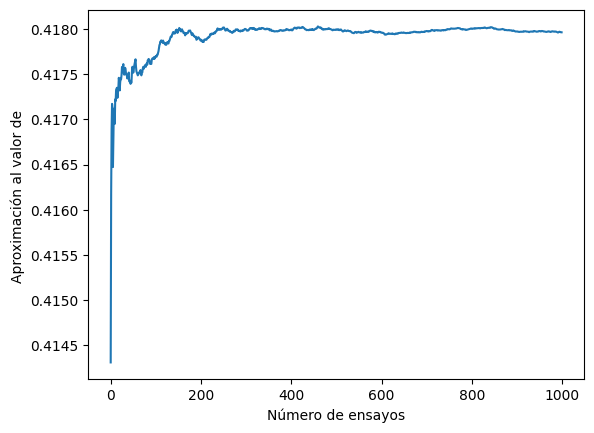

In [89]:
N = 1000
m = 5
n_sim = 1000

print("\nAproximacion de la integral nos da: ", MCM(N, m))

# Estabilidad de la aproximación
ensayos1 = range(0,N)
simu = []
p = []
for i in range(1,N+1): 
    p.append(MCM(N,m))
    simu.append(sum(p)/i)


estabilidad_simulacion(ensayos1, simu)

#print("\nSimulaciones ",n_sim," nos da aproximación de: ", simulaciones(n_sim, N, m)[0])

#### Histograma

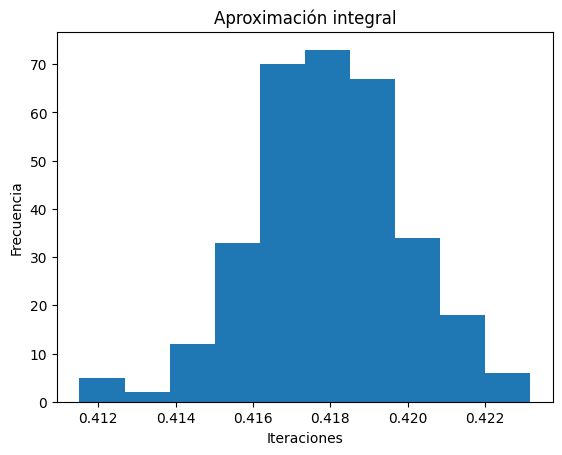

In [92]:
# Histograma

aproximacion = sim(320)

plt.hist(aproximacion) #Grafica las frecuencias de la aproximación a la probabilidad de las N simualciones con 750 experiementos cada una.
plt.xlabel('Iteraciones')
plt.ylabel('Frecuencia')
plt.title('Aproximación integral')
plt.show()